In [9]:
! pip install torch accelerate imblearn transformers nltk pandas numpy matplotlib seaborn wordcloud xgboost fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp311-cp311-macosx_13_0_x86_64.whl size=356798 sha256=930e57d485ec7b365bee9f2d7cbfc87378dbd0634c7b45369c6d79d2a97d2575
  Stored in directory: /Users/bushraabdullahi/Library/Caches/pip/wheels/12/89/c9/c932d04c4dd65abe347bbb3e6f7668688753cbc585305ad8b7
Successfully built fasttext

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

csv_file_path = "preprocessed_data_3.csv"

preprocessed_df = pd.read_csv(csv_file_path)

preprocessed_df["text"].fillna("", inplace=True)
preprocessed_df.isnull().sum()


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

Accuracy: 0.9570368255780759
Precision: 0.9502103786816269
Recall: 0.9648248362289946
F1-score: 0.9574618428490672


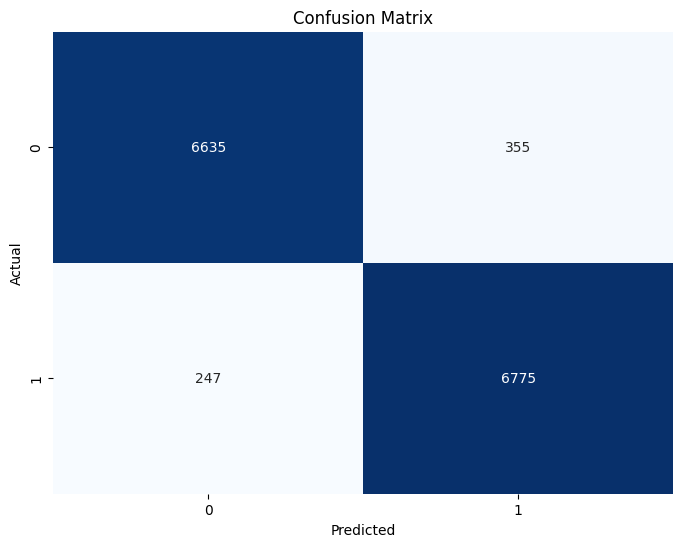

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets
train_df, test_df = train_test_split(preprocessed_df, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training text
vectorizer.fit(train_df["text"])

# Transform the training and test text into TF-IDF feature vectors
train_tfidf = vectorizer.transform(train_df["text"])
test_tfidf = vectorizer.transform(test_df["text"])

# Get the corresponding labels
train_labels = train_df["label"]
test_labels = test_df["label"]

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(train_tfidf, train_labels)

# Predict on the test set
predictions = classifier.predict(test_tfidf)

# Calculate the evaluation metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.8703968027405081
Precision: 0.8909582457194353
Recall: 0.8447735687838223
F1-score: 0.867251461988304


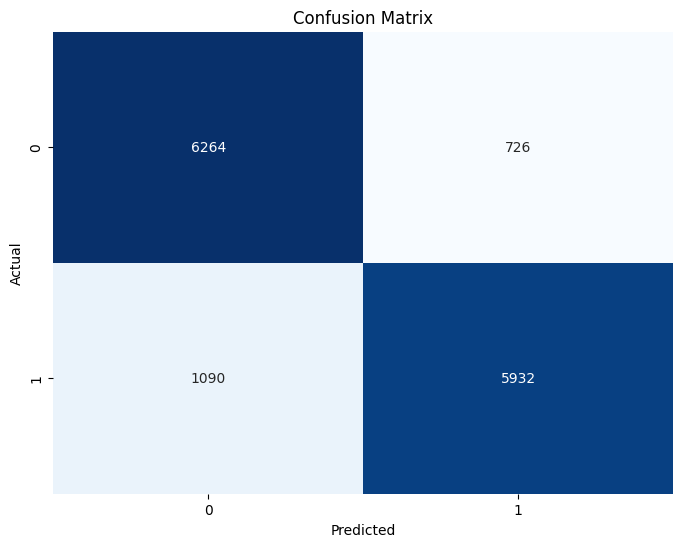

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets
train_df, test_df = train_test_split(preprocessed_df, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training text
vectorizer.fit(train_df["text"])

# Transform the training and test text into TF-IDF feature vectors
train_tfidf = vectorizer.transform(train_df["text"])
test_tfidf = vectorizer.transform(test_df["text"])

# Get the corresponding labels
train_labels = train_df["label"]
test_labels = test_df["label"]

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(train_tfidf, train_labels)

# Predict on the test set
predictions = classifier.predict(test_tfidf)

# Calculate the evaluation metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets
train_df, test_df = train_test_split(preprocessed_df, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training text
vectorizer.fit(train_df["text"])

# Transform the training and test text into TF-IDF feature vectors
train_tfidf = vectorizer.transform(train_df["text"])
test_tfidf = vectorizer.transform(test_df["text"])

# Get the corresponding labels
train_labels = train_df["label"]
test_labels = test_df["label"]

# Train a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear')  
classifier.fit(train_tfidf, train_labels)

# Predict on the test set
predictions = classifier.predict(test_tfidf)

# Calculate the evaluation metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.9384099343419926
Precision: 0.9374911208978548
Recall: 0.9397607519225292
F1-score: 0.9386245643979803


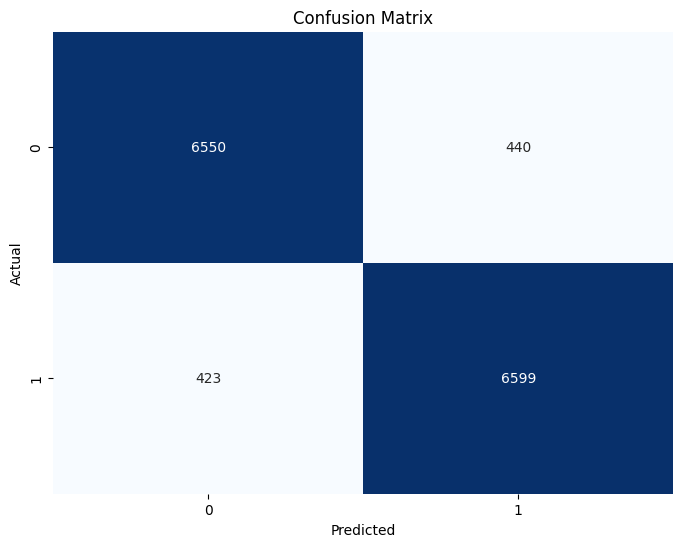

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets
train_df, test_df = train_test_split(preprocessed_df, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training text
vectorizer.fit(train_df["text"])

# Transform the training and test text into TF-IDF feature vectors
train_tfidf = vectorizer.transform(train_df["text"])
test_tfidf = vectorizer.transform(test_df["text"])

# Get the corresponding labels
train_labels = train_df["label"]
test_labels = test_df["label"]

# Train a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(train_tfidf, train_labels)

# Predict on the test set
predictions = classifier.predict(test_tfidf)

# Calculate the evaluation metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


/Users/bushraabdullahi/Library/CloudStorage/OneDrive-Personal/Uni/L6/Final Project/FP-final/venv/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Accuracy: 0.9729517556380245
Precision: 0.9672246448164299
Recall: 0.9792082027912276
F1-score: 0.9731795343570872


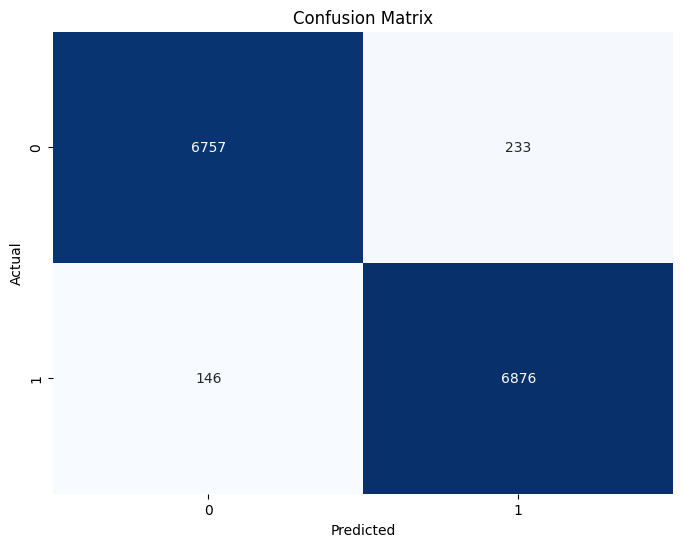

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets
train_df, test_df = train_test_split(preprocessed_df, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training text
vectorizer.fit(train_df["text"])

# Transform the training and test text into TF-IDF feature vectors
train_tfidf = vectorizer.transform(train_df["text"])
test_tfidf = vectorizer.transform(test_df["text"])

# Get the corresponding labels
train_labels = train_df["label"]
test_labels = test_df["label"]

# Train an XGBoost classifier
classifier = xgb.XGBClassifier()  # Initialize XGBoost classifier
classifier.fit(train_tfidf, train_labels)

# Predict on the test set
predictions = classifier.predict(test_tfidf)

# Calculate the evaluation metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
